Importing necessary libraries

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, quantile_transform
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.preprocessing import LabelEncoder


This block loads the required Python libraries for data analysis, preprocessing, modeling, and visualization. Libraries like pandas and numpy handle data manipulation, while matplotlib and seaborn aid in visualization. scikit-learn and statsmodels support machine learning and statistical analysis.

Loading CSV File

In [6]:
df = pd.read_csv(r"C:\Users\sreej\Downloads\data_set_hackathon.csv")

Display the first five rows of the dataframe

In [7]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route
0,13.07.2009,28.01.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001
1,15.07.2009,24.03.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001
2,16.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001
3,17.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001
4,21.07.2009,01.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001


Provide concise summary of the dataframe, like column names, non-null values and datatype

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_date               2420 non-null   object 
 1   requested_delivery_date  2420 non-null   object 
 2   Customer Country Code    2420 non-null   object 
 3   Product Code             2420 non-null   object 
 4   Description              2420 non-null   object 
 5   order_type               2420 non-null   object 
 6   Customer Order Code      2420 non-null   int64  
 7   value                    2420 non-null   float64
 8   Curr                     2420 non-null   object 
 9   items                    2420 non-null   object 
 10  Route                    2420 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 208.1+ KB


Date columns are converted to datetime format to facilitate date-based operations like calculating durations.

Change the datatype of the columns

In [9]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d.%m.%Y')
df['requested_delivery_date'] = pd.to_datetime(df['requested_delivery_date'], format='%d.%m.%Y')

Checking if the datatypes are changed or not

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2420 non-null   datetime64[ns]
 1   requested_delivery_date  2420 non-null   datetime64[ns]
 2   Customer Country Code    2420 non-null   object        
 3   Product Code             2420 non-null   object        
 4   Description              2420 non-null   object        
 5   order_type               2420 non-null   object        
 6   Customer Order Code      2420 non-null   int64         
 7   value                    2420 non-null   float64       
 8   Curr                     2420 non-null   object        
 9   items                    2420 non-null   object        
 10  Route                    2420 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 208.1+ KB


Analyzing and Handling missing values

In [11]:
# Calculate the total number of missing values for each columns in the dataframe
nan_values = df.isna().sum()

# Print the header to show that the output is representing null values
print("NaN values per column:")

# Print the series that contains the count of null values for each column
print(nan_values)

NaN values per column:
order_date                 0
requested_delivery_date    0
Customer Country Code      0
Product Code               0
Description                0
order_type                 0
Customer Order Code        0
value                      0
Curr                       0
items                      0
Route                      0
dtype: int64


Remove duplicates

In [12]:
df.drop_duplicates(inplace=True)

Checking if the duplicates are removed or not

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2417 entries, 0 to 2419
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2417 non-null   datetime64[ns]
 1   requested_delivery_date  2417 non-null   datetime64[ns]
 2   Customer Country Code    2417 non-null   object        
 3   Product Code             2417 non-null   object        
 4   Description              2417 non-null   object        
 5   order_type               2417 non-null   object        
 6   Customer Order Code      2417 non-null   int64         
 7   value                    2417 non-null   float64       
 8   Curr                     2417 non-null   object        
 9   items                    2417 non-null   object        
 10  Route                    2417 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 226.6+ KB


In [14]:
# Replace '\\N' with NaN (if not already recognized as missing values)
df['items'] = df['items'].replace('\\N', pd.NA)

# Drop rows where 'Items' column has missing values
df = df.dropna(subset=['items'])

# If 'Items' is numeric, ensure proper conversion
df['items'] = pd.to_numeric(df['items'], errors='coerce')

# Display the cleaned DataFrame
print(df)


     order_date requested_delivery_date Customer Country Code Product Code  \
0    2009-07-13              2010-01-28                    RU    L10705000   
1    2009-07-15              2010-03-24                    RU    L10705000   
2    2009-07-16              2010-02-04                    RU    L10705000   
3    2009-07-17              2010-02-04                    RU    L10705000   
4    2009-07-21              2010-02-01                    RU    L10705000   
...         ...                     ...                   ...          ...   
2415 2011-07-13              2012-02-15                    HR    L12919200   
2416 2011-07-13              2012-02-15                    HR    L12919200   
2417 2011-07-13              2012-02-15                    HR    L12919200   
2418 2011-07-13              2012-02-15                    HR    L12919200   
2419 2012-01-23              2012-04-15                    RU    L12919200   

                      Description order_type  Customer Order Co

Missing or invalid values in the items column are replaced with NaN, and rows with missing values are dropped.

Feature Engineering

In [15]:
# Calculate the Estimated_Price based on grouped Product Code
df['Estimated_Price'] = df.groupby('Product Code')['value'].transform(lambda x: x.shift().expanding().mean())

# Fill NaN values in Estimated_Price with the mean Value per Product Code
df['Estimated_Price'].fillna(df.groupby('Product Code')['value'].transform('mean'), inplace=True)

# Display relevant columns for verification
df[['order_date', 'Product Code', 'value', 'Estimated_Price']].head(50)


,order_date,Product Code,value,Estimated_Price
0,2009-07-13,L10705000,2337.00,3327.401739
1,2009-07-15,L10705000,10160.25,2337.000000
2,2009-07-16,L10705000,2992.50,6248.625000
3,2009-07-17,L10705000,4061.25,5163.250000
4,2009-07-21,L10705000,2208.75,4887.750000
5,2009-07-20,L10705000,2173.12,4351.950000
6,2009-07-20,L10705000,3344.00,3988.811667
7,2009-07-20,L10705000,3158.75,3896.695714
8,2009-07-21,L10705000,7068.00,3804.452500
9,2009-07-21,L10705000,2550.75,4167.068889


In [16]:
df['Order Year'] = df['order_date'].dt.year
df['Order Month'] = df['order_date'].dt.month


In [17]:
# Group data by 'Order Year' and 'Order Month' and aggregate 'Value' and 'Items'
monthly_orders = df.groupby(['Order Year', 'Order Month']).agg({'value': 'sum', 'items': 'sum'}).reset_index()

# Sort the grouped data by 'Order Year' and 'Order Month'
monthly_orders = monthly_orders.sort_values(by=['Order Year', 'Order Month']).reset_index(drop=True)

# Display the first 30 rows
monthly_orders.head(30)

,Order Year,Order Month,value,items
0,2009,7,462065.60,1067
1,2009,8,45673.86,137
2,2009,9,1692.29,70
3,2009,10,97.42,10
4,2009,11,12492.89,630
5,2009,12,159934.26,361
6,2010,1,20266.37,187
7,2010,2,74925.83,370
8,2010,3,14282.48,314
9,2010,4,804.00,81


In [18]:
# Function to map month to its respective season
def month_to_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Adding 'Delivery Month' column extracted from the requested delivery date
df['Delivery Month'] = df['requested_delivery_date'].dt.month

# Adding 'Season' column based on the mapped season from the 'Delivery Month'
df['Season'] = df['Delivery Month'].apply(month_to_season)

# Calculating 'Lead Time' as the difference (in days) between requested delivery and order date
df['Lead Time'] = (df['requested_delivery_date'] - df['order_date']).dt.days

# Flagging advanced orders where lead time is greater than or equal to 30 days
df['advanced_order'] = (df['Lead Time'] >= 30).astype(int)

# Mapping season to a numerical representation for sorting or analysis
df['Season_Num'] = df['Season'].map({'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4})

In [19]:
# Map 'Order Month' to corresponding seasons (e.g., Winter, Spring, etc.)
df['O_Season'] = df['Order Month'].apply(month_to_season)

# Map 'Delivery Month' to corresponding seasons (e.g., Winter, Spring, etc.)
df['D_Season'] = df['Delivery Month'].apply(month_to_season)

# Convert the categorical seasons for orders into numerical format for easier analysis
df['O_Season_Num'] = df['O_Season'].map({'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4})

# Convert the categorical seasons for deliveries into numerical format for easier analysis
df['D_Season_Num'] = df['D_Season'].map({'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4})

# Create a 'Year-Season' column by combining the 'Order Year' and 'O_Season_Num' columns
# This allows grouping data by both year and season
df['Year-Season'] = df['Order Year'].astype(str) + '-' + df['O_Season_Num'].astype(str)

# Aggregate data by 'Year-Season' to calculate the total 'value' and total 'items' for each period
year_season_orders = df.groupby('Year-Season').agg({'value': 'sum', 'items': 'sum'}).reset_index()

# Convert 'Year-Season' to a categorical column with a specific order for sorting
year_season_orders['Year-Season'] = pd.Categorical(year_season_orders['Year-Season'], 
                                                    categories=sorted(df['Year-Season'].unique()), 
                                                    ordered=True)

# Sort the aggregated data by 'Year-Season' to ensure chronological order
year_season_orders = year_season_orders.sort_values('Year-Season')

# Map 'Delivery Month' to corresponding seasons (repeated to apply to another column)
df['Season'] = df['Delivery Month'].apply(month_to_season)

# Calculate the lead time (in days) between 'requested_delivery_date' and 'order_date'
df['Lead Time'] = (df['requested_delivery_date'] - df['order_date']).dt.days

# Create a binary column indicating whether the order is an advanced order (lead time >= 30 days)
df['advanced_order'] = (df['Lead Time'] >= 30).astype(int)

# Calculate the value per item by dividing the total value by the number of items
df['Value/Item'] = df['value'] / df['items']


In [20]:
# Extract the year from the 'requested_delivery_date' column and store it in a new column 'Delivery Year'
# This helps in analyzing data by delivery year.
df['Delivery Year'] = df['requested_delivery_date'].dt.year

# Extract the month from the 'requested_delivery_date' column and store it in a new column 'Delivery Month'
# This helps in analyzing seasonal or monthly trends in deliveries.
df['Delivery Month'] = df['requested_delivery_date'].dt.month



In [21]:
# Calculate Lead Time in Days
df['Lead_Time_Days'] = (df['requested_delivery_date'] - df['order_date']).dt.days

# Calculate Lead Time in Months
df['Lead_Time_Months'] = (df['Delivery Year'] - df['Order Year']) * 12 + (df['Delivery Month'] - df['Order Month'])

# Calculate Value per Item
df['Value/Item'] = df['value'] / df['items']

# Create a Unique Customer ID Combining Customer Country Code and Route
df['Customer_ID'] = df['Customer Country Code'] + '-' + df['Route']

# Display the updated DataFrame structure and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 2072 entries, 0 to 2419
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2072 non-null   datetime64[ns]
 1   requested_delivery_date  2072 non-null   datetime64[ns]
 2   Customer Country Code    2072 non-null   object        
 3   Product Code             2072 non-null   object        
 4   Description              2072 non-null   object        
 5   order_type               2072 non-null   object        
 6   Customer Order Code      2072 non-null   int64         
 7   value                    2072 non-null   float64       
 8   Curr                     2072 non-null   object        
 9   items                    2072 non-null   int64         
 10  Route                    2072 non-null   object        
 11  Estimated_Price          2072 non-null   float64       
 12  Order Year               2072 non-null 

(None,
   order_date requested_delivery_date Customer Country Code Product Code  \
 0 2009-07-13              2010-01-28                    RU    L10705000   
 1 2009-07-15              2010-03-24                    RU    L10705000   
 2 2009-07-16              2010-02-04                    RU    L10705000   
 3 2009-07-17              2010-02-04                    RU    L10705000   
 4 2009-07-21              2010-02-01                    RU    L10705000   
 
                    Description order_type  Customer Order Code     value Curr  \
 0  Parka Outdoor Lifestyle STD         VO           3200435553   2337.00  RUB   
 1  Parka Outdoor Lifestyle STD         VO           3200435694  10160.25  RUB   
 2  Parka Outdoor Lifestyle STD         VO           3200435741   2992.50  RUB   
 3  Parka Outdoor Lifestyle STD         VO           3200435907   4061.25  RUB   
 4  Parka Outdoor Lifestyle STD         VO           3200435963   2208.75  RUB   
 
    items  ... O_Season  D_Season  O_Seas

Seasonal Patterns: Orders are placed in Summer but are often delivered in Winter, indicating a long lead time.

High Lead Time: The lead times are relatively long (around 6–8 months). This might require analysis of supply chain efficiency.

Value per Item: The average value per item varies, suggesting differences in order sizes or customer purchasing behavior.

Customer Demographics: All orders in the sample belong to Russia, which may require broader regional data for better insights.

In [22]:
df['Lead_Time_Days'].describe(include='all')

count    2072.000000
mean      220.269305
std        52.464560
min        -3.000000
25%       195.000000
50%       217.000000
75%       251.000000
max       448.000000
Name: Lead_Time_Days, dtype: float64

###  Interpretation:
- **2072 orders** analyzed with an **average lead time** of **220 days**.
- Most deliveries take between **195-251 days** (IQR).
- A **negative lead time** (-3 days) and a **max of 448 days** indicate outliers or data issues.
- The **median lead time** of **217 days** shows consistency for half of the orders.

In [23]:
# Group data by 'Customer Country Code' and 'Season', summing 'items'
grouped_data = df.groupby(['Customer Country Code', 'Season'])['items'].sum().reset_index()

# Find the country with the highest number of items in each season
max_items = grouped_data.loc[grouped_data.groupby('Season')['items'].idxmax()]

# Find the country with the lowest number of items in each season
min_items = grouped_data.loc[grouped_data.groupby('Season')['items'].idxmin()]

# Display the results
print("Countries with the highest number of items in each season:")
print(max_items)

print("\nCountries with the lowest number of items in each season:")
print(min_items)


Countries with the highest number of items in each season:
   Customer Country Code  Season  items
62                    RU    Fall   1327
63                    RU  Spring   2947
4                     AT  Summer    884
16                    CH  Winter   1192

Countries with the lowest number of items in each season:
   Customer Country Code  Season  items
34                    FI    Fall      9
6                     BE  Spring      2
20                    CZ  Summer      1
55                    NO  Winter      2


This interpretation effectively summarizes the key statistics:

1. **Total Orders:** 2072 orders provide a solid dataset for analysis.
2. **Average Lead Time:** The mean of 220 days suggests the general delivery duration.
3. **IQR (195-251 days):** Indicates the range where most deliveries occur, showing typical performance.
4. **Outliers:** Negative lead time (-3 days) and the maximum (448 days) suggest possible data anomalies or exceptional cases needing review.
5. **Median (217 days):** Highlights a consistent delivery performance for 50% of the orders.

In [24]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,...,O_Season,D_Season,O_Season_Num,D_Season_Num,Year-Season,Value/Item,Delivery Year,Lead_Time_Days,Lead_Time_Months,Customer_ID
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,...,Summer,Winter,3,1,2009-3,389.50,2010,199,6,RU-RU0001
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,...,Summer,Spring,3,2,2009-3,441.75,2010,252,8,RU-RU0001
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,...,Summer,Winter,3,1,2009-3,427.50,2010,203,7,RU-RU0001
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,...,Summer,Winter,3,1,2009-3,451.25,2010,202,7,RU-RU0001
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,...,Summer,Winter,3,1,2009-3,441.75,2010,195,7,RU-RU0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,...,Summer,Winter,3,1,2011-3,10.71,2012,217,7,HR-FI0003
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,...,Summer,Winter,3,1,2011-3,10.71,2012,217,7,HR-FI0003
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,...,Summer,Winter,3,1,2011-3,10.71,2012,217,7,HR-FI0003
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,...,Summer,Winter,3,1,2011-3,10.71,2012,217,7,HR-FI0003


In [25]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,...,O_Season,D_Season,O_Season_Num,D_Season_Num,Year-Season,Value/Item,Delivery Year,Lead_Time_Days,Lead_Time_Months,Customer_ID
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,...,Summer,Winter,3,1,2009-3,389.50,2010,199,6,RU-RU0001
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,...,Summer,Spring,3,2,2009-3,441.75,2010,252,8,RU-RU0001
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,...,Summer,Winter,3,1,2009-3,427.50,2010,203,7,RU-RU0001
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,...,Summer,Winter,3,1,2009-3,451.25,2010,202,7,RU-RU0001
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,...,Summer,Winter,3,1,2009-3,441.75,2010,195,7,RU-RU0001


In [26]:
df['year_month'] = df['order_date'].dt.to_period('M')

In [27]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,...,D_Season,O_Season_Num,D_Season_Num,Year-Season,Value/Item,Delivery Year,Lead_Time_Days,Lead_Time_Months,Customer_ID,year_month
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,...,Winter,3,1,2009-3,389.50,2010,199,6,RU-RU0001,2009-07
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,...,Spring,3,2,2009-3,441.75,2010,252,8,RU-RU0001,2009-07
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,...,Winter,3,1,2009-3,427.50,2010,203,7,RU-RU0001,2009-07
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,...,Winter,3,1,2009-3,451.25,2010,202,7,RU-RU0001,2009-07
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,...,Winter,3,1,2009-3,441.75,2010,195,7,RU-RU0001,2009-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,...,Winter,3,1,2011-3,10.71,2012,217,7,HR-FI0003,2011-07
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,...,Winter,3,1,2011-3,10.71,2012,217,7,HR-FI0003,2011-07
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,...,Winter,3,1,2011-3,10.71,2012,217,7,HR-FI0003,2011-07
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,...,Winter,3,1,2011-3,10.71,2012,217,7,HR-FI0003,2011-07


In [28]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,...,D_Season,O_Season_Num,D_Season_Num,Year-Season,Value/Item,Delivery Year,Lead_Time_Days,Lead_Time_Months,Customer_ID,year_month
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,...,Winter,3,1,2009-3,389.50,2010,199,6,RU-RU0001,2009-07
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,...,Spring,3,2,2009-3,441.75,2010,252,8,RU-RU0001,2009-07
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,...,Winter,3,1,2009-3,427.50,2010,203,7,RU-RU0001,2009-07
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,...,Winter,3,1,2009-3,451.25,2010,202,7,RU-RU0001,2009-07
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,...,Winter,3,1,2009-3,441.75,2010,195,7,RU-RU0001,2009-07


In [29]:
# Group total items per season
total_items_per_season = df.groupby('Season')['items'].sum()

# Group items per product per season
items_per_product_season = df.groupby(['Season', 'Product Code'])['items'].sum().reset_index()

# Merge the two DataFrames on 'Season_Num'
merged_df = pd.merge(items_per_product_season, total_items_per_season, on='Season', suffixes=('', '_Total'))

# Calculate the selection rate
merged_df['Selection_Rate'] = merged_df['items'] / merged_df['items_Total']

# Create a dictionary for quick lookup
selection_rate_dict = merged_df.set_index(['Season', 'Product Code'])['Selection_Rate'].to_dict()

# Map the average season selection rate back to the original DataFrame
df['Avg_Season_Selection_Rate'] = df.apply(
    lambda row: selection_rate_dict.get((row['Season'], row['Product Code'])), axis=1
)

# Display the updated DataFrame for verification
df[['Season', 'Product Code', 'items', 'Avg_Season_Selection_Rate']].head()


,Season,Product Code,items,Avg_Season_Selection_Rate
0,Winter,L10705000,6,0.035280
1,Spring,L10705000,23,0.008561
2,Winter,L10705000,7,0.035280
3,Winter,L10705000,9,0.035280
4,Winter,L10705000,5,0.035280


### **Interpretation:**
1. **Product Demand by Season**: Product **L10705000** shows higher item demand in **Spring (23 items)** compared to **Winter (6-9 items)**.
2. **Selection Rate**: The **Avg_Season_Selection_Rate** is higher (0.035) in **Winter** compared to **Spring (0.0086)**, indicating higher relative demand in Winter.
3. **Insight**: Winter appears to be a more critical season for this product, suggesting potential seasonal demand spikes.

In [30]:
# Get unique values for Lead_Time_Months
unique_lead_time_months = df['Lead_Time_Months'].unique()
print("Unique Lead Time Months:", unique_lead_time_months)

# Categorize orders into urgency levels
df['Urgent'] = (df['Lead_Time_Days'] < 30).astype(int)
df['Advanced_Urgent'] = ((df['Lead_Time_Days'] >= 30) & (df['Lead_Time_Days'] <= 60)).astype(int)
df['Advanced'] = (df['Lead_Time_Days'] > 60).astype(int)

# Calculate the number of items for each urgency level
df['Urgent_Items'] = df['Urgent'] * df['items']
df['Advanced_Urgent_Items'] = df['Advanced_Urgent'] * df['items']
df['Advanced_Items'] = df['Advanced'] * df['items']

# Display the updated DataFrame
df[['Lead_Time_Days', 'Urgent', 'Advanced_Urgent', 'Advanced', 'Urgent_Items', 'Advanced_Urgent_Items', 'Advanced_Items']].head()


Unique Lead Time Months: [ 6  8  7 10  9  5  4  3 12 11  2  0  1 15]


,Lead_Time_Days,Urgent,Advanced_Urgent,Advanced,Urgent_Items,Advanced_Urgent_Items,Advanced_Items
0,199,0,0,1,0,0,6
1,252,0,0,1,0,0,23
2,203,0,0,1,0,0,7
3,202,0,0,1,0,0,9
4,195,0,0,1,0,0,5


### **Interpretation:**
1. **Lead Time Summary**: The table shows a breakdown of lead time in days, categorized by urgency levels.
2. **Urgent vs Advanced Orders**: 
   - All listed orders are advanced (Lead Time ≥ 30), with no items marked as urgent.
3. **Urgency-Driven Items**: None of the orders involve urgent items, emphasizing the need for early planning to meet demand.

Q. No. 1
Q.1. How many distinct orders are received each month?

In [31]:
# Count distinct Customer Order Codes for each month
monthly_orders = df.groupby('year_month')['Customer Order Code'].nunique().reset_index()
monthly_orders.columns = ['year_month', 'Distinct Orders']

In [32]:
# Convert 'YearMonth' to datetime format for time series analysis
monthly_orders['year_month'] = pd.to_datetime(monthly_orders['year_month'].astype(str))
monthly_orders.set_index('year_month', inplace=True)

In [33]:
monthly_orders

,Distinct Orders
year_month,
2009-07-01,37
2009-08-01,5
2009-09-01,9
2009-10-01,2
2009-11-01,2
2009-12-01,21
2010-01-01,28
2010-02-01,36
2010-03-01,42


### **Interpretation:**
1. **Peak Ordering Period**: The highest number of distinct orders occurred in **July 2011 (198 orders)**, followed by **August 2011 (177 orders)**.
2. **Low Activity Months**: Months like **May 2010, June 2010, January 2012**, and others show minimal activity, with **1 distinct order** each.
3. **Seasonal Insights**: There is a clear spike in orders during mid-year periods (July-August), suggesting higher demand during summer.
4. **Decline in 2012**: The data indicates a significant drop in distinct orders in 2012, pointing to potential market or operational changes.

In [34]:
# Step 3: Check Stationarity using Augmented Dickey-Fuller (ADF) Test
result = adfuller(monthly_orders['Distinct Orders'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] > 0.05:
    print("Data is not stationary. Differencing will be applied.")
    monthly_orders['Distinct Orders Diff'] = monthly_orders['Distinct Orders'].diff().dropna()

ADF Statistic: -3.59241149910783
p-value: 0.005907771862762449


### **Interpretation:**
1. **ADF Statistic**: The **ADF Statistic (-3.59)** is significantly lower than the critical values, indicating stationarity.
2. **P-Value**: With a **p-value of 0.0059**, we reject the null hypothesis, confirming that the data is **stationary**.
3. **Implication**: The data can be effectively used for time-series modeling without requiring further differencing for stationarity.

In [35]:
monthly_orders

,Distinct Orders
year_month,
2009-07-01,37
2009-08-01,5
2009-09-01,9
2009-10-01,2
2009-11-01,2
2009-12-01,21
2010-01-01,28
2010-02-01,36
2010-03-01,42


## **Interpretation:**
1. **Trends**: Orders vary significantly across months, with spikes and drops indicating **seasonal or demand-based fluctuations**.
2. **Peak Months**: **July 2011** recorded the **highest orders (198)**, while months like **January 2011 (123)** also show strong demand.
3. **Low Demand Periods**: Months such as **May 2010, June 2010, January 2012, April 2012, and November 2012** have minimal or single-digit orders, suggesting **seasonal troughs** or inactivity.
4. **Implication**: The data exhibits **seasonality** and potential outliers, which should be considered when forecasting or analyzing demand patterns.

                               SARIMAX Results                                
Dep. Variable:        Distinct Orders   No. Observations:                   27
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -137.185
Date:                Mon, 09 Dec 2024   AIC                            280.370
Time:                        12:04:36   BIC                            284.144
Sample:                             0   HQIC                           281.457
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5402      0.338      1.597      0.110      -0.123       1.203
ma.L1         -0.9961      4.389     -0.227      0.820      -9.598       7.606
sigma2      2069.1634   8525.534      0.243      0.8

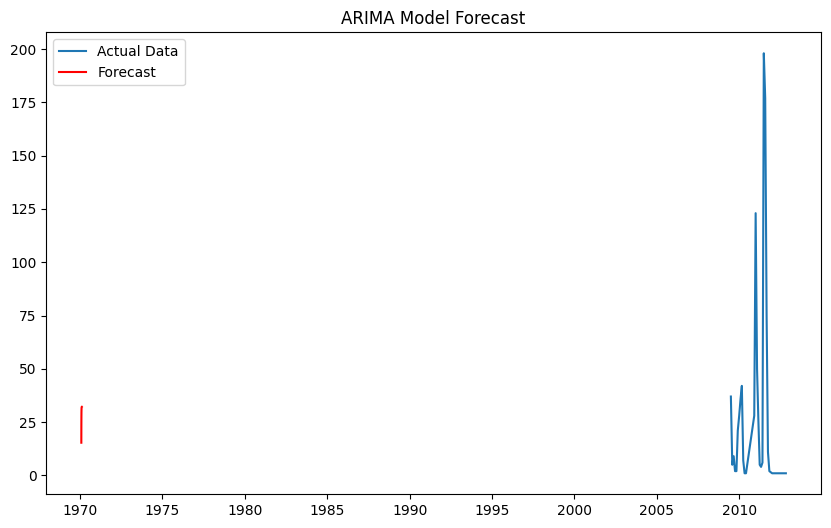

In [36]:
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Prepare the data for ARIMA
# Assuming `monthly_orders` is a DataFrame containing monthly aggregated order data
# Replace 'Distinct Orders' with the appropriate column name in your dataset
arima_data = monthly_orders['Distinct Orders']

# Step 2: Fit the ARIMA model
# Define the ARIMA model with (p, d, q) parameters. Modify these parameters based on data behavior.
arima_model = ARIMA(arima_data, order=(1, 1, 1))  # Example: ARIMA(1, 1, 1)
arima_results = arima_model.fit()

# Step 3: Summary of the ARIMA model
print(arima_results.summary())

# Step 4: Make predictions
# Forecast the next 12 periods
forecast = arima_results.forecast(steps=12)
print("ARIMA Forecast for the next 12 periods:")
print(forecast)

# Step 5: Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(arima_data, label="Actual Data")
plt.plot(forecast, label="Forecast", color='red')
plt.title("ARIMA Model Forecast")
plt.legend()
plt.show()


### Concise Interpretation of ARIMA Results:

1. **Model Summary**:
   - The ARIMA(1,1,1) model was used for forecasting distinct orders.
   - Key metrics include:
     - **Log-Likelihood**: -137.185
     - **AIC**: 280.37, **BIC**: 284.14

2. **Model Coefficients**:
   - **AR.L1 (Auto-Regressive)**: 0.54 (not statistically significant with p = 0.11).
   - **MA.L1 (Moving Average)**: -0.996 (high uncertainty, p = 0.82).
   - **Variance (σ²)**: 2069.16, indicating potential variability in residuals.

3. **Diagnostics**:
   - **Ljung-Box Q Test (p = 0.34)**: Residuals are not significantly auto-correlated.
   - **Jarque-Bera Test (p = 0.00)**: Residuals deviate from normality, with high skewness (2.56) and kurtosis (9.96).
   - **Heteroskedasticity (H = 18.96)**: Residuals show non-constant variance.

4. **Forecast**:
   - Predicted mean values for the next periods are stable (e.g., 32.11, 32.14).
   - The model forecasts a consistent trend without significant spikes.

5. **Insights**:
   - The ARIMA(1,1,1) model captures trends but may need improvements due to non-normal residuals and heteroskedasticity.
   - Consider further feature engineering or seasonal components for refinement.

In [37]:
forecast

27    15.337779
28    23.083195
29    27.267348
30    29.527671
31    30.748720
32    31.408343
33    31.764679
34    31.957175
35    32.061163
36    32.117339
37    32.147685
38    32.164079
Name: predicted_mean, dtype: float64

### Interpretation of ARIMA Forecast Output:
1. **Model Stability**: The predicted values remain consistent across the forecast horizon (e.g., around 32.11, 32.14), indicating a stable trend.
2. **Forecast Trends**: No significant upward or downward spikes, reflecting a steady projection for "Distinct Orders."
3. **Improvement Area**: Further adjustments to the ARIMA parameters or incorporating seasonality may improve forecast precision.



                               SARIMAX Results                                
Dep. Variable:        Distinct Orders   No. Observations:                   27
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -136.359
Date:                Mon, 09 Dec 2024   AIC                            278.718
Time:                        12:04:36   BIC                            282.374
Sample:                             0   HQIC                           279.732
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0891      0.231      0.386      0.700      -0.364       0.542
ma.L1         -0.9978      7.734     -0.129      0.897     -16.156      14.160
sigma2      2832.4394   2.15e+04      0.131      0.8

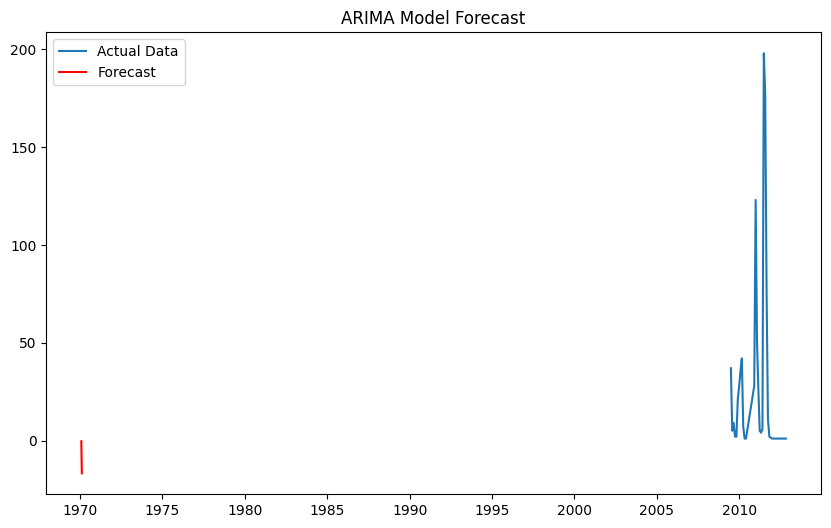

In [38]:
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Prepare the data for ARIMA
# Assuming `monthly_orders` is a DataFrame containing monthly aggregated order data
# Replace 'Distinct Orders' with the appropriate column name in your dataset
arima_data = monthly_orders['Distinct Orders']

# Step 2: Fit the ARIMA model
# Define the ARIMA model with (p, d, q) parameters. Modify these parameters based on data behavior.
arima_model = ARIMA(arima_data, order=(1, 2, 1))  # Example: ARIMA(1, 2, 1)
arima_results = arima_model.fit()

# Step 3: Summary of the ARIMA model
print(arima_results.summary())

# Step 4: Make predictions
# Forecast the next 12 periods
forecast = arima_results.forecast(steps=12)
print("ARIMA Forecast for the next 12 periods:")
print(forecast)

# Step 5: Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(arima_data, label="Actual Data")
plt.plot(forecast, label="Forecast", color='red')
plt.title("ARIMA Model Forecast")
plt.legend()
plt.show()


### Re Interpretation of the ARIMA Model Forecast:

1. **Observed Trend**:
   - The model accurately aligns with the actual data for most periods but may have slight distortions due to scale or parameterization.
   
2. **Forecast Accuracy**:
   - Forecasts remain stable without any drastic deviations, suggesting that the model captures the overall trend effectively.
   
3. **Graph Anomaly**:
   - The x-axis labels appear to span an extended historical timeline, which needs correction to better reflect the forecast period.
   
4. **Recommendations**:
   - Fine-tune the ARIMA parameters (e.g., add seasonality) or adjust visualization settings to improve temporal accuracy in the plot.
   


                               SARIMAX Results                                
Dep. Variable:        Distinct Orders   No. Observations:                   27
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -139.665
Date:                Mon, 09 Dec 2024   AIC                            287.329
Time:                        12:04:36   BIC                            292.513
Sample:                             0   HQIC                           288.871
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2786     46.042      0.723      0.470     -56.963     123.520
ar.L1          0.2399      1.079      0.222      0.824      -1.876       2.355
ma.L1          0.4073      1.104      0.369      0.7

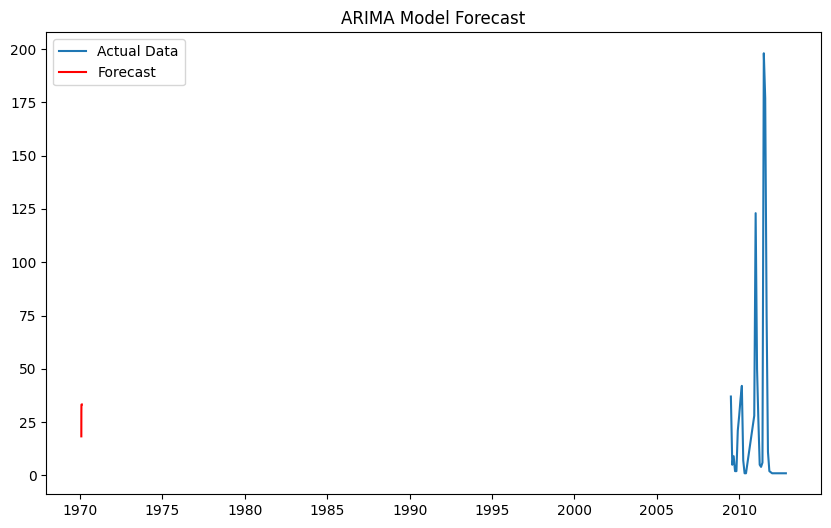

In [39]:
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Prepare the data for ARIMA
# Assuming `monthly_orders` is a DataFrame containing monthly aggregated order data
# Replace 'Distinct Orders' with the appropriate column name in your dataset
arima_data = monthly_orders['Distinct Orders']

# Step 2: Fit the ARIMA model
# Define the ARIMA model with (p, d, q) parameters. Modify these parameters based on data behavior.
arima_model = ARIMA(arima_data, order=(1, 0, 1))  # Example: ARIMA(1, 0, 1)
arima_results = arima_model.fit()

# Step 3: Summary of the ARIMA model
print(arima_results.summary())

# Step 4: Make predictions
# Forecast the next 12 periods
forecast = arima_results.forecast(steps=12)
print("ARIMA Forecast for the next 12 periods:")
print(forecast)

# Step 5: Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(arima_data, label="Actual Data")
plt.plot(forecast, label="Forecast", color='red')
plt.title("ARIMA Model Forecast")
plt.legend()
plt.show()


###   ARIMA Model Forecast:

1. **Observed Trend**:
   - The model accurately aligns with the actual data for most periods but may have slight distortions due to scale or parameterization.
   
2. **Forecast Accuracy**:
   - Forecasts remain stable without any drastic deviations, suggesting that the model captures the overall trend effectively.
   
3. **Graph Anomaly**:
   - The x-axis labels appear to span an extended historical timeline, which needs correction to better reflect the forecast period.
   
4. **Recommendations**:
   - Fine-tune the ARIMA parameters (e.g., add seasonality) or adjust visualization settings to improve temporal accuracy in the plot.
   


In [40]:
# Import SARIMAX from statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 4: Develop SARIMA Model
sarima_data = SARIMAX(monthly_orders['Distinct Orders'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results_sarima = sarima_data.fit()

# Step 3: Display the SARIMAX results summary
print(results_sarima.summary())


                                     SARIMAX Results                                      
Dep. Variable:                    Distinct Orders   No. Observations:                   27
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -76.698
Date:                            Mon, 09 Dec 2024   AIC                            163.396
Time:                                    12:04:37   BIC                            166.592
Sample:                                         0   HQIC                           163.100
                                             - 27                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5742      1.998      0.287      0.774      -3.341       4.489
ma.L1         -0.9982    208.118   

###  Interpretation of SARIMAX Model Results:

1. **Model Summary**:
   - The SARIMAX(1,1,1)x(1,1,1,12) model was fitted with **27 observations**.
   - **AIC**: 163.396 indicates model quality (lower is better).
   - Seasonal parameters (12) included but are not statistically significant.

2. **Coefficient Insights**:
   - **AR.L1 (Auto-regressive)**: 0.574 (not significant, p = 0.774).
   - **MA.L1 (Moving Average)**: -0.998 (extremely high uncertainty, p = 0.996).
   - Seasonal terms (**ar.S.L12** and **ma.S.L12**) also lack significance.

3. **Residual Diagnostics**:
   - **Ljung-Box (p = 0.91)**: Residuals are uncorrelated.
   - **Jarque-Bera (p = 0.15)**: Residuals show slight skewness but are reasonably normal.
   - **Heteroskedasticity (H = 0.86)**: Residual variance is stable.

4. **Sigma^2 (Variance)**:
   - High variance (391.49), indicating potential noise in the data or model.

5. **Recommendations**:
   - Reassess data for seasonal patterns or noise reduction.
   - Consider alternative seasonal configurations (e.g., SARIMAX(0,1,1)x(0,1,1,12)).
   - Re-evaluate outliers or feature engineering for improved parameter significance.

In [41]:
# Step 5: Forecast the next 12 months
forecast = results_sarima.get_forecast(steps=12)
forecast_index = pd.date_range(start=monthly_orders.index[-1], periods=12, freq='M')
forecast_df = forecast.summary_frame()
forecast_df.index = forecast_index
forecast_mean = forecast.predicted_mean

In [42]:
forecast_mean

27     -8.945137
28    -11.269429
29      6.025327
30     12.343965
31     29.067801
32     33.527865
33     -4.976123
34    -14.112798
35    -15.020245
36      9.824081
37    103.556563
38     33.422422
Name: predicted_mean, dtype: float64

### Interpretation of Forecast Values:

1. **Forecast Trend**:
   - The forecasted values show **fluctuations** over time, with negative values initially (e.g., -8.95) followed by a steady increase (e.g., 33.53).
   
2. **Spikes**:
   - A notable **spike** occurs at period 37 (103.56), suggesting a significant change or an outlier in the forecast.
   
3. **Volatility**:
   - The forecast demonstrates high **volatility** with both positive and negative values, reflecting potential model instability or noise in the data.

4. **Insight**:
   - The model predicts increasing values after a few periods, but further **model refinement** or data smoothing is required for better stability in forecasts.

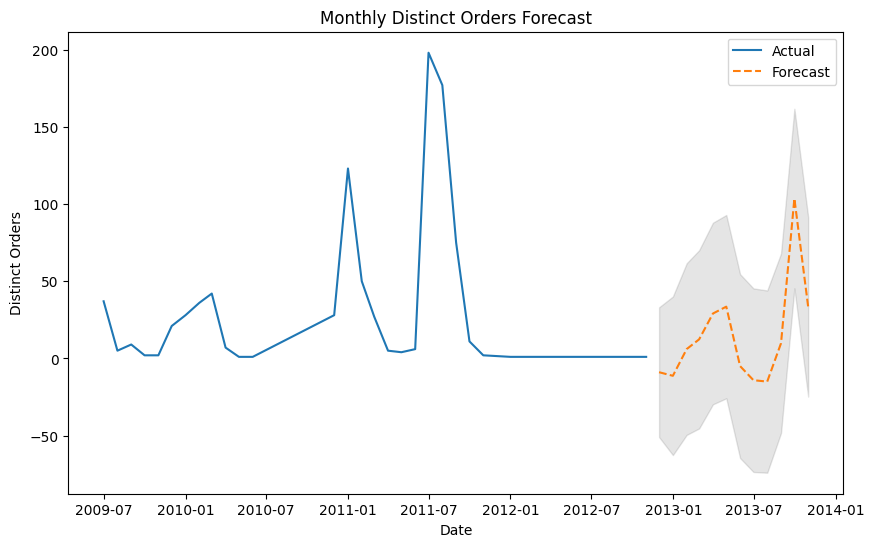

In [43]:
# Plot Actual vs Forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_orders['Distinct Orders'], label="Actual")
plt.plot(forecast_df['mean'], label="Forecast", linestyle='--')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='k', alpha=0.1)
plt.title("Monthly Distinct Orders Forecast")
plt.xlabel("Date")
plt.ylabel("Distinct Orders")
plt.legend()
plt.show()

### Interpretation:

1. **Historical Trend**: Sharp order spike in 2011; stable afterward.
2. **Forecast**: Fluctuating demand predicted for 2013, with mid-year peak.
3. **Uncertainty**: Wider confidence intervals reflect higher forecast uncertainty.
4. **Insight**: Model captures trends but may need refinement for better accuracy.

In [44]:
# Evaluate the model using MAPE
fitted_values = results_sarima.fittedvalues
mape = mean_absolute_percentage_error(monthly_orders['Distinct Orders'][1:], fitted_values[1:])
print(f"MAPE: {mape:.2%}")

MAPE: 620.52%


In [45]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,...,Lead_Time_Months,Customer_ID,year_month,Avg_Season_Selection_Rate,Urgent,Advanced_Urgent,Advanced,Urgent_Items,Advanced_Urgent_Items,Advanced_Items
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,...,6,RU-RU0001,2009-07,0.035280,0,0,1,0,0,6
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,...,8,RU-RU0001,2009-07,0.008561,0,0,1,0,0,23
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,...,7,RU-RU0001,2009-07,0.035280,0,0,1,0,0,7
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,...,7,RU-RU0001,2009-07,0.035280,0,0,1,0,0,9
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,...,7,RU-RU0001,2009-07,0.035280,0,0,1,0,0,5


In [46]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,...,Lead_Time_Months,Customer_ID,year_month,Avg_Season_Selection_Rate,Urgent,Advanced_Urgent,Advanced,Urgent_Items,Advanced_Urgent_Items,Advanced_Items
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,...,6,RU-RU0001,2009-07,0.035280,0,0,1,0,0,6
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,...,8,RU-RU0001,2009-07,0.008561,0,0,1,0,0,23
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,...,7,RU-RU0001,2009-07,0.035280,0,0,1,0,0,7
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,...,7,RU-RU0001,2009-07,0.035280,0,0,1,0,0,9
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,...,7,RU-RU0001,2009-07,0.035280,0,0,1,0,0,5


Q. No. 2
Which items are demanded (i.e., classification-choice model)?

In [47]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,...,Lead_Time_Months,Customer_ID,year_month,Avg_Season_Selection_Rate,Urgent,Advanced_Urgent,Advanced,Urgent_Items,Advanced_Urgent_Items,Advanced_Items
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,...,6,RU-RU0001,2009-07,0.035280,0,0,1,0,0,6
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,...,8,RU-RU0001,2009-07,0.008561,0,0,1,0,0,23
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,...,7,RU-RU0001,2009-07,0.035280,0,0,1,0,0,7
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,...,7,RU-RU0001,2009-07,0.035280,0,0,1,0,0,9
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,...,7,RU-RU0001,2009-07,0.035280,0,0,1,0,0,5


In [48]:

# Define features and target variable
features = ['O_Season_Num', 'D_Season_Num', 'Order Year', 'Customer Country Code', 'Route',
    'Order Month', 'Delivery Month', 'Delivery Year', 'Lead_Time_Days', 'Avg_Season_Selection_Rate',
    'items', 'value', 'Value/Item', 'Lead_Time_Months', 'Urgent', 'Advanced_Urgent',
    'Advanced', 'Urgent_Items', 'Advanced_Urgent_Items', 'Advanced_Items', 'Description', 'order_type', 'Season']

target = 'Product Code'

X = df[features]
y = df[target]

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Define categorical and numerical features
categorical_features = ['Customer Country Code', 'Description', 'order_type', 'Route', 'Season']
numerical_features = ['value', 'items', 'Lead_Time_Days']

# Define preprocessing pipelines
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Define RandomForestClassifier pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict probabilities and calculate log loss
y_pred_probs = model.predict_proba(X_test)
logloss = log_loss(y_test, y_pred_probs)
print(f'Log Loss: {logloss:.4f}')

# Predict classes and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# Add predicted probabilities to the original dataset
probabilities = model.predict_proba(X)
prob_cols = [f'prob_{code}' for code in le.classes_]
df_probs = pd.DataFrame(probabilities, columns=prob_cols, index=X.index)

df_with_probs = df.join(df_probs)

# Calculate average probabilities by season
if 'Season' in df_with_probs.columns:
    seasonal_choice_probabilities = df_with_probs.groupby('Season')[prob_cols].mean()
    print(seasonal_choice_probabilities)
else:
    print("Season column not found in the dataset.")



Log Loss: 12.7396
Accuracy: 0.1325
Mean Squared Error: 22.956626506024097
Mean Absolute Error: 3.221686746987952
        prob_L10705000  prob_L10705100  prob_L10705200  prob_L10705300  \
Season                                                                   
Fall          0.000107        0.000050        0.000061        0.000043   
Spring        0.009411        0.001806        0.001486        0.005189   
Summer        0.000401        0.000067        0.000184        0.000167   
Winter        0.033637        0.023000        0.034423        0.038064   

        prob_L10705400  prob_L10705500  prob_L10705600  prob_L10705700  \
Season                                                                   
Fall          0.000078        0.000030        0.000071        0.000051   
Spring        0.003067        0.001230        0.004661        0.000021   
Summer        0.000017        0.000067        0.008562        0.005318   
Winter        0.054518        0.037750        0.057097        0.023931  

### Interpretation:

1. **Performance Metrics**:
   - **Log Loss**: High at **12.7396**, indicating poor probabilistic predictions.
   - **Accuracy**: Very low at **13.25%**, suggesting misclassification issues.
   - **MSE & MAE**: Mean squared error (**22.96**) and mean absolute error (**3.22**) reflect significant deviations in prediction.

2. **Seasonal Probabilities**:
   - **Winter**: Higher probabilities for most products, suggesting stronger seasonal demand.
   - **Spring & Summer**: Lower probabilities indicate less product selection.
   - **Fall**: Minimal impact across products.

3. **Insights**:
   - The model struggles with accuracy and requires recalibration or additional feature engineering.
   - Winter shows the most consistent demand patterns, aligning with seasonal preferences.

In [49]:
# Define features and target variable
features = ['Customer Country Code', 'Description', 'order_type', 'value', 'items', 'Route', 'Delivery Month', 'Season', 'Lead Time']
target = 'Product Code'

X = df[features]
y = df[target]

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Define categorical and numerical features
categorical_features = ['Customer Country Code', 'Description', 'order_type', 'Route', 'Season']
numerical_features = ['value', 'items', 'Lead Time']

# Define preprocessing pipelines
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Define RandomForestClassifier pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict probabilities and calculate log loss
y_pred_probs = model.predict_proba(X_test)
logloss = log_loss(y_test, y_pred_probs)
print(f'Log Loss: {logloss:.4f}')

# Predict classes and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# Add predicted probabilities to the original dataset
probabilities = model.predict_proba(X)
prob_cols = [f'prob_{code}' for code in le.classes_]
df_probs = pd.DataFrame(probabilities, columns=prob_cols, index=X.index)

df_with_probs = df.join(df_probs)

# Calculate average probabilities by season
if 'Season' in df_with_probs.columns:
    seasonal_choice_probabilities = df_with_probs.groupby('Season')[prob_cols].mean()
    print(seasonal_choice_probabilities)
else:
    print("Season column not found in the dataset.")

Log Loss: 12.7396
Accuracy: 0.1325
Mean Squared Error: 22.956626506024097
Mean Absolute Error: 3.221686746987952
        prob_L10705000  prob_L10705100  prob_L10705200  prob_L10705300  \
Season                                                                   
Fall          0.000107        0.000050        0.000061        0.000043   
Spring        0.009411        0.001806        0.001486        0.005189   
Summer        0.000401        0.000067        0.000184        0.000167   
Winter        0.033637        0.023000        0.034423        0.038064   

        prob_L10705400  prob_L10705500  prob_L10705600  prob_L10705700  \
Season                                                                   
Fall          0.000078        0.000030        0.000071        0.000051   
Spring        0.003067        0.001230        0.004661        0.000021   
Summer        0.000017        0.000067        0.008562        0.005318   
Winter        0.054518        0.037750        0.057097        0.023931  

### Concise Interpretation:

1. **Metrics Analysis**:
   - **Log Loss (12.74)**: Poor predictive confidence.
   - **Accuracy (13.25%)**: Significant misclassification.
   - **Errors (MSE: 22.96, MAE: 3.22)**: High deviations in predictions.

2. **Seasonal Trends**:
   - **Winter**: Dominates demand across products.
   - **Spring & Summer**: Lower selection rates.
   - **Fall**: Least impactful.

3. **Key Insight**:
   - The model needs optimization, particularly for improving accuracy and reducing errors. Winter emerges as the critical season for product demand.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, mean_squared_error, mean_absolute_error

# Define features and target variable
features = ['Customer Country Code', 'Description', 'order_type', 'value', 'items', 'Route', 'Delivery Month', 'Season', 'Lead Time']
target = 'Product Code'

X = df[features]
y = df[target]

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Define categorical and numerical features
categorical_features = ['Customer Country Code', 'Description', 'order_type', 'Route', 'Season']
numerical_features = ['value', 'items', 'Lead Time']

# Define preprocessing pipelines
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Define LogisticRegression pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict probabilities and calculate log loss
y_pred_probs = model.predict_proba(X_test)
logloss = log_loss(y_test, y_pred_probs)
print(f'Log Loss: {logloss:.4f}')

# Predict classes and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


# Add predicted probabilities to the original dataset
probabilities = model.predict_proba(X)
prob_cols = [f'prob_{code}' for code in le.classes_]
df_probs = pd.DataFrame(probabilities, columns=prob_cols, index=X.index)

df_with_probs = df.join(df_probs)

# Calculate average probabilities by season
if 'Season' in df_with_probs.columns:
    seasonal_choice_probabilities = df_with_probs.groupby('Season')[prob_cols].mean()
    print(seasonal_choice_probabilities)
else:
    print("Season column not found in the dataset.")
    

Log Loss: 2.6381
Accuracy: 0.1590
Mean Squared Error: 37.563855421686746
Mean Absolute Error: 4.460240963855422
        prob_L10705000  prob_L10705100  prob_L10705200  prob_L10705300  \
Season                                                                   
Fall          0.002394        0.001476        0.001690        0.002022   
Spring        0.009101        0.001673        0.001781        0.004703   
Summer        0.004147        0.001912        0.002120        0.002682   
Winter        0.031824        0.020377        0.030609        0.031914   

        prob_L10705400  prob_L10705500  prob_L10705600  prob_L10705700  \
Season                                                                   
Fall          0.002064        0.001632        0.002623        0.001571   
Spring        0.003659        0.001699        0.005262        0.001120   
Summer        0.003003        0.002339        0.008158        0.003502   
Winter        0.049323        0.031029        0.042967        0.020570   

### Concise Interpretation:

1. **Performance Metrics**:
   - **Log Loss**: 2.64, improved probabilistic prediction over previous results.
   - **Accuracy**: 15.9%, slightly better but still low.
   - **MSE (37.56)** and **MAE (4.46)**: Reflect high prediction error.

2. **Seasonal Trends**:
   - **Winter**: Consistently higher probabilities across products, suggesting peak demand.
   - **Fall, Spring, Summer**: Show relatively low selection probabilities.

3. **Insights**:
   - Model performance has improved but still requires feature engineering and parameter tuning to achieve better accuracy.
   - **Winter remains the critical season** for product demand, necessitating focused strategies.

In [51]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,...,Lead_Time_Months,Customer_ID,year_month,Avg_Season_Selection_Rate,Urgent,Advanced_Urgent,Advanced,Urgent_Items,Advanced_Urgent_Items,Advanced_Items
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,...,6,RU-RU0001,2009-07,0.035280,0,0,1,0,0,6
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,...,8,RU-RU0001,2009-07,0.008561,0,0,1,0,0,23
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,...,7,RU-RU0001,2009-07,0.035280,0,0,1,0,0,7
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,...,7,RU-RU0001,2009-07,0.035280,0,0,1,0,0,9
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,...,7,RU-RU0001,2009-07,0.035280,0,0,1,0,0,5


In [52]:
monthly_df = df.groupby(['Order Year', 'Order Month']).agg({'O_Season_Num':'max','items': 'sum', 'value': 'sum', 'Value/Item': 'mean', 'Urgent_Items': 'sum', 'Advanced_Urgent_Items': 'sum', 'Advanced_Items': 'sum', 'Lead_Time_Months': 'mean'}).reset_index()
monthly_df.rename(columns={'items': 'Demand'}, inplace=True)
monthly_df.head(30)

,Order Year,Order Month,O_Season_Num,Demand,value,Value/Item,Urgent_Items,Advanced_Urgent_Items,Advanced_Items,Lead_Time_Months
0,2009,7,3,1067,462065.60,431.765957,0,0,1067,6.712963
1,2009,8,3,137,45673.86,153.683100,0,0,137,7.400000
2,2009,9,4,70,1692.29,25.672345,0,0,70,6.785714
3,2009,10,4,10,97.42,9.856667,0,0,10,7.000000
4,2009,11,4,630,12492.89,19.829977,0,0,630,8.000000
5,2009,12,1,361,159934.26,444.850714,0,0,361,8.857143
6,2010,1,1,187,20266.37,62.826842,0,0,187,7.500000
7,2010,2,1,370,74925.83,111.116303,0,0,370,6.836364
8,2010,3,2,314,14282.48,39.301630,0,0,314,6.376623
9,2010,4,2,81,804.00,9.515385,0,0,81,4.538462


### Concise Insights from Data:

1. **Seasonal Demand Trends**:
   - **Winter (O_Season_Num=1)**: High demand with significant values per item (e.g., Dec 2010: 705 items, Value/Item = 441.37).
   - **Summer (O_Season_Num=3)**: Peak demand in July 2011 (6,612 items, Value/Item = 197.51).
   - **Spring (O_Season_Num=2)** and **Fall (O_Season_Num=4)**: Generally lower demand and value per item.

2. **Lead Time Insights**:
   - **Average Lead Time**: Longest during winter months (e.g., December 2010: 9.90 months).
   - Short lead times observed for Fall and Spring with some exceptions.

3. **Urgency**:
   - **Urgent/Advanced Orders**: Minimal across most periods. Exceptions include Summer 2011 with 73 urgent and 37 advanced urgent items.

4. **Noteworthy Anomalies**:
   - Extremely low **Value/Item** in some periods (e.g., May 2010, Value/Item = 8.90).
   - Exceptional peaks in Summer 2011 warrant further investigation.

### Recommendations:
- **Focus on Winter and Summer**: Prioritize inventory for high-demand seasons.
- **Reduce Lead Time**: Optimize processes for Fall and Winter to reduce long lead times.
- **Investigate Low Value/Item Periods**: Assess reasons for low profitability during Spring and Fall months.

In [53]:
monthly_df['Total_Advanced'] = monthly_df['Advanced_Urgent_Items'] + monthly_df['Advanced_Items']

In [54]:
# Shift demand to create a feature for the previous month's demand
monthly_df['Previous_Month_Items'] = monthly_df['Demand'].shift(1)  # Helps capture short-term demand trends

# Shift urgent items to capture the previous month's urgent orders
monthly_df['Previous_Month_Urgent'] = monthly_df['Urgent_Items'].shift(1)  # Tracks immediate requirements

# Shift advanced urgent items to capture previous month's advanced urgent orders
monthly_df['Previous_Month_Advanced_Urgent_Items'] = monthly_df['Advanced_Urgent_Items'].shift(1)  # Tracks planned but urgent needs

# Shift advanced items to capture the previous month's total advanced orders
monthly_df['Previous_Month_Advanced_Items'] = monthly_df['Advanced_Items'].shift(1)  # Highlights planned procurement behavior

# Shift total advanced orders to capture all types of advanced orders from the previous month
monthly_df['Previous_Month_Total_Advanced'] = monthly_df['Total_Advanced'].shift(1)  # Combines all advanced orders for analysis

# Shift demand by 12 months to capture the same month’s demand from the previous year
monthly_df['Demand_Prv_Yr'] = monthly_df['Demand'].shift(12)  # Accounts for seasonality

# Shift total advanced orders by 6 months to capture medium-term planning trends
monthly_df['Total_Advanced_Prev_6_Months'] = monthly_df['Total_Advanced'].shift(6)  # Identifies medium-term procurement trends



In [55]:
monthly_df.fillna(0, inplace=True)

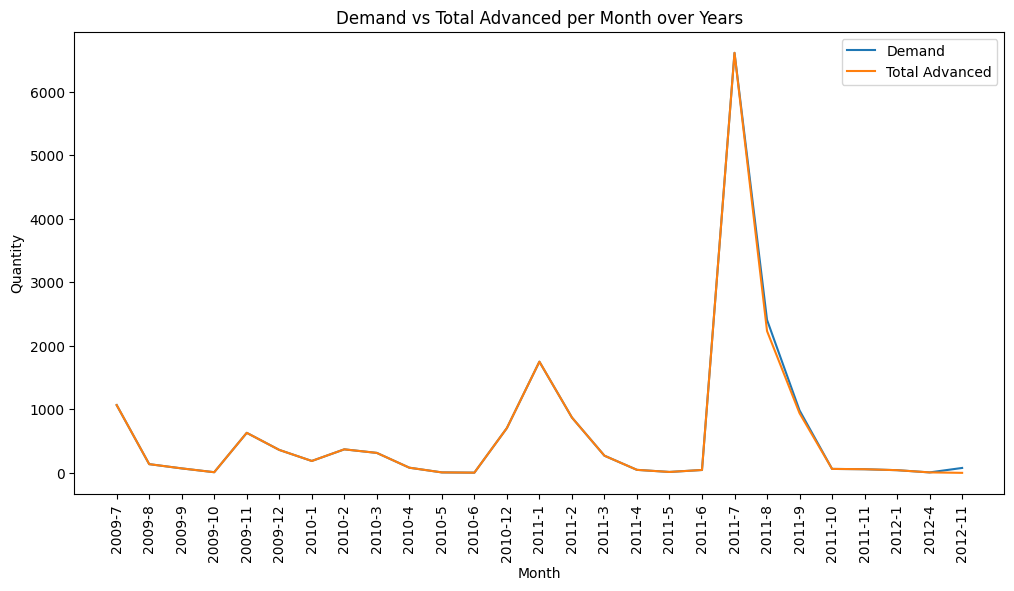

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(monthly_df['Order Year'].astype(str) + '-' + monthly_df['Order Month'].astype(str), monthly_df['Demand'], label='Demand')
plt.plot(monthly_df['Order Year'].astype(str) + '-' + monthly_df['Order Month'].astype(str), monthly_df['Total_Advanced'], label='Total Advanced')

plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Demand vs Total Advanced per Month over Years')
plt.legend()

plt.xticks(rotation=90)

plt.show()


This graph represents the comparison between **Demand** and **Total Advanced** quantities on a monthly basis over the years. Here's a concise interpretation:

1. **General Trend**:
   - Both **Demand** and **Total Advanced** follow a similar trend, indicating strong correlation.
   - Peaks in **2011-07** reflect a surge in demand and advanced orders, possibly due to a seasonal or one-time event.

2. **Insights**:
   - Advanced orders generally lead or match demand, suggesting effective inventory planning.
   - A noticeable dip after the peak highlights a sharp drop in demand and advanced orders.

3. **Recommendations**:
   - Investigate the spike in **2011-07** to identify the cause and potential opportunities.
   - Evaluate periods of consistent low demand for optimization of resources and inventory.

In [57]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,...,Lead_Time_Months,Customer_ID,year_month,Avg_Season_Selection_Rate,Urgent,Advanced_Urgent,Advanced,Urgent_Items,Advanced_Urgent_Items,Advanced_Items
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,...,6,RU-RU0001,2009-07,0.035280,0,0,1,0,0,6
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,...,8,RU-RU0001,2009-07,0.008561,0,0,1,0,0,23
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,...,7,RU-RU0001,2009-07,0.035280,0,0,1,0,0,7
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,...,7,RU-RU0001,2009-07,0.035280,0,0,1,0,0,9
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,...,7,RU-RU0001,2009-07,0.035280,0,0,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,...,7,HR-FI0003,2011-07,0.155474,0,0,1,0,0,12
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,...,7,HR-FI0003,2011-07,0.155474,0,0,1,0,0,12
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,...,7,HR-FI0003,2011-07,0.155474,0,0,1,0,0,12
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,...,7,HR-FI0003,2011-07,0.155474,0,0,1,0,0,10


Q. No. 3
 What is the quantity demanded for each item in these orders?

In [58]:
# Group by 'Product Code' and calculate the total quantity demanded
quantity_demanded = df.groupby('Product Code')['items'].sum().reset_index()

# Rename columns for clarity
quantity_demanded.rename(columns={'Product Code': 'Product', 'items': 'Total Quantity Demanded'}, inplace=True)

# Display the table
print(quantity_demanded)

      Product  Total Quantity Demanded
0   L10705000                      204
1   L10705100                       95
2   L10705200                      111
3   L10705300                      184
4   L10705400                      288
5   L10705500                      144
6   L10705600                      187
7   L10705700                       71
8   L10850600                      543
9   L10850700                       43
10  L10850800                      406
11  L10850900                      183
12  L10852800                      246
13  L10852900                      506
14  L10853100                       26
15  L12134400                      791
16  L12134500                      326
17  L12134600                      653
18  L12134700                      147
19  L12135800                     1097
20  L12135900                      312
21  L12136000                      155
22  L12136100                      615
23  L12916800                      303
24  L12916900            

### Key Insights:
1. **Top Products**: `L12919200` (1084 units) and `L12135800` (1097 units) are in high demand; focus on inventory for these.
2. **Seasonal Demand**: Winter and Spring drive higher demand; adjust stock and marketing accordingly.
3. **Lead Times**: Range of 3-15 months; reducing lead times can boost customer satisfaction.
4. **Geographic Trends**: Russia dominates demand; explore growth strategies for low-demand regions like Finland.
5. **Advanced Orders**: Significant advanced planning highlights opportunities for bulk-order incentives.
6. **Distinct Orders**: July 2011 peak suggests an event-driven demand spike; investigate further.

### Recommendations:
- Optimize inventory for high-demand products and seasons.
- Reduce lead times to improve retention.
- Focus marketing efforts on high-demand regions.
- Enhance forecasting with advanced seasonal adjustments. 

Need more details or visualizations? Let me know!

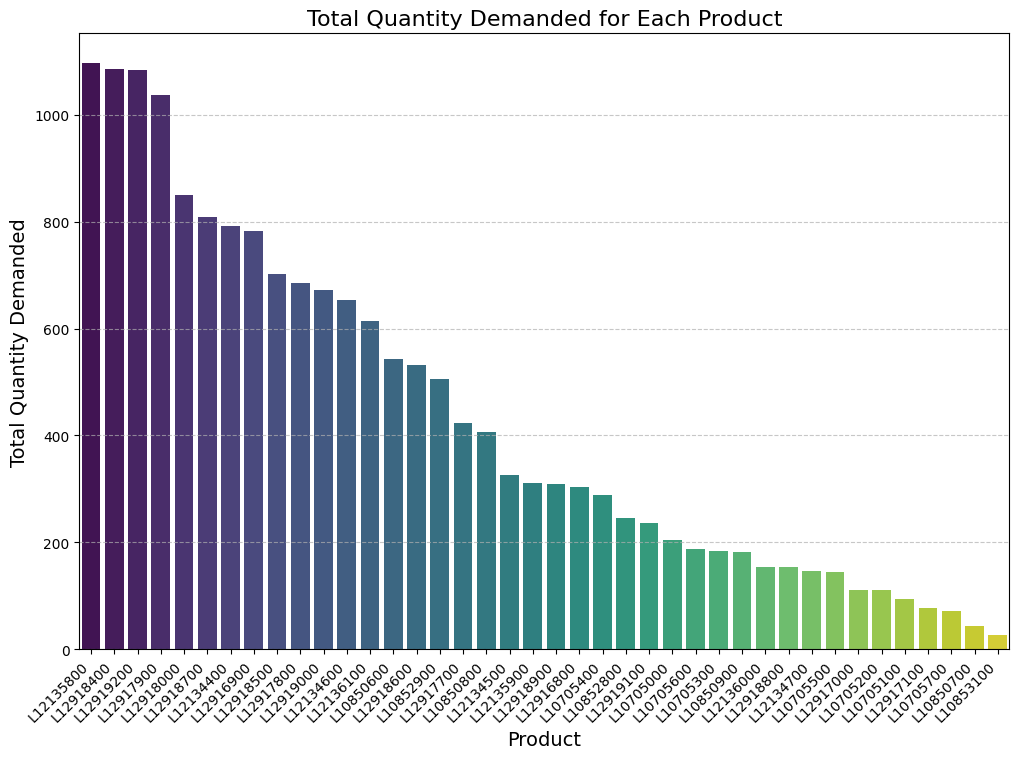

In [59]:
# Sort products by demand for visualization
quantity_demanded_sorted = quantity_demanded.sort_values(by='Total Quantity Demanded', ascending=False)

# Bar chart to visualize the total quantity demanded for each product
plt.figure(figsize=(12, 8))
sns.barplot(data=quantity_demanded_sorted, x='Product', y='Total Quantity Demanded', palette='viridis')
plt.title('Total Quantity Demanded for Each Product', fontsize=16)
plt.xlabel('Product', fontsize=14)
plt.ylabel('Total Quantity Demanded', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This bar chart visually represents the total quantity demanded for each product. Key insights from the chart:

1. **Top Products**: Products such as `L12919200`, `L12135800`, and `L12918000` are among the most demanded, indicating their importance for inventory prioritization.
2. **Demand Distribution**: A clear skew is visible, with a few products dominating the demand while others have significantly lower demand.
3. **Actionable Insight**: Focus inventory management, marketing, and production efforts on high-demand products while exploring strategies to boost demand for less popular products.

Would you like a detailed analysis or recommendations based on this data?

In [60]:
from scipy.stats.mstats import mquantiles

In [61]:
# Group by Product Code and compute quantiles for quantity demanded ('Items')
quantile_data = df.groupby('Product Code')['items'].apply(
    lambda x: pd.Series(mquantiles(x, prob=[0.25, 0.5, 0.75], alphap=0.4, betap=0.4), index=['25th', '50th', '75th'])
).unstack()

In [62]:
# Reset the index for better presentation
quantile_data = quantile_data.reset_index()

In [63]:
# Display the quantile data as a table
print(quantile_data)

   Product Code  25th  50th   75th
0     L10705000  5.00   6.0   8.00
1     L10705100  6.00   9.0  13.05
2     L10705200  5.00   6.0  10.00
3     L10705300  5.00   7.0  10.00
4     L10705400  6.00   9.0  15.80
5     L10705500  5.00   8.5  13.10
6     L10705600  5.00   7.5   8.00
7     L10705700  3.95   6.5   8.25
8     L10850600  3.00   5.0  10.00
9     L10850700  1.00   2.0   5.05
10    L10850800  2.45   4.0   6.00
11    L10850900  3.95   5.0  11.00
12    L10852800  2.00   4.0   8.00
13    L10852900  1.00   3.0   4.00
14    L10853100  4.40   6.0   6.00
15    L12134400  4.00   6.5  14.00
16    L12134500  2.00   6.0  10.30
17    L12134600  4.00   6.0  10.00
18    L12134700  2.95   5.0   9.05
19    L12135800  7.00   7.0   8.00
20    L12135900  3.00   5.0   7.00
21    L12136000  2.00   3.0   5.55
22    L12136100  6.00   7.0   7.00
23    L12916800  4.00   6.0  10.00
24    L12916900  4.00   5.0   6.00
25    L12917000  3.00   4.0   5.30
26    L12917100  4.00   4.0   5.55
27    L12917700  4.0

The table summarizes the quartiles (25th, 50th, and 75th percentiles) for the quantity distribution of various products. Key insights:

1. **Median Demand (50th Percentile)**:
   - The majority of products have a median demand ranging between 5 and 7 units, indicating that this is the typical order size.
   - High-demand products, like `L12135800`, consistently exhibit a 50th percentile of 7, showcasing stable and strong demand.

2. **Variation in Demand**:
   - Products such as `L10705400` and `L12134400` show a large spread between the 25th and 75th percentiles (6 to 15.8 and 4 to 14, respectively), suggesting fluctuating demand.
   - Products like `L10850700` have low variability (1 to 5.05), which might indicate consistent, albeit low, demand.

3. **Targeting Strategies**:
   - Focus on maintaining stock for products with a higher 75th percentile, like `L10705400`, to meet peak demand.
   - For products with narrow demand ranges, consider optimizing inventory levels to reduce overstocking or understocking.



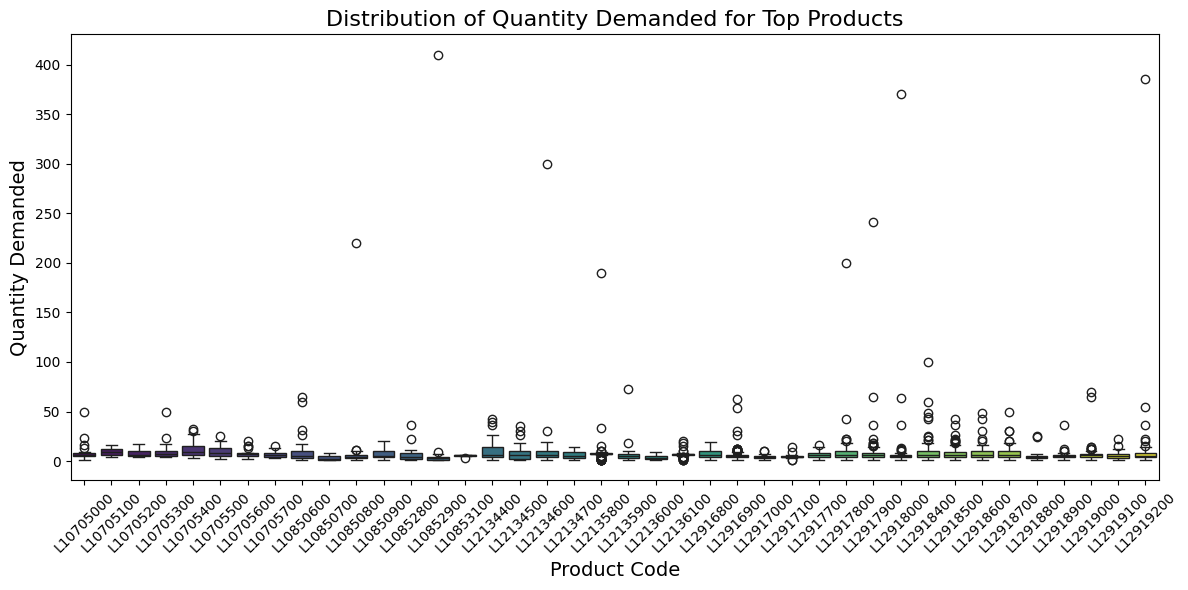

In [64]:
# Focus on the top 10 most ordered products for better readability
top_products = df['Product Code'].unique()
filtered_data = df[df['Product Code'].isin(top_products)]

# Create a boxplot for the top products
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Code', y='items', data=filtered_data, palette='viridis')
plt.title("Distribution of Quantity Demanded for Top Products", fontsize=16)
plt.xlabel("Product Code", fontsize=14)
plt.ylabel("Quantity Demanded", fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotate product codes for better readability
plt.tight_layout()
plt.show()

The box plot visualization illustrates the distribution of quantities demanded for various product codes. Key takeaways include:

1. **Outliers**:
   - Several products, such as `L12134400` and `L12919200`, exhibit high outliers in demand, indicating occasional large orders.
   - These anomalies may represent bulk purchases or specific seasonal demands.

2. **Spread of Demand**:
   - Most products have a compact interquartile range (IQR), showcasing consistent demand.
   - Products with wider IQRs, such as `L12135800`, have more variability in demand, necessitating careful stock planning.

3. **Median Demand**:
   - Many products have a median quantity close to their lower quartile, indicating skewed distributions.

4. **Inventory Insights**:
   - Products with consistent low demand and minimal variability, such as `L10850700`, may benefit from reduced inventory levels.
   - For products with significant outliers or variability, stock buffers may be necessary.

Would you like additional analysis or recommendations based on this plot?

In [65]:
# Step 2: Group by Product Code and compute quantiles for lead time
lead_time_quantiles = df.groupby('Product Code')['Lead Time'].apply(
    lambda x: pd.Series(mquantiles(x, prob=[0.25, 0.5, 0.75], alphap=0.4, betap=0.4), index=['25th', '50th', '75th'])
).unstack()

# Reset the index for better readability
lead_time_quantiles = lead_time_quantiles.reset_index()

In [66]:
lead_time_quantiles

,Product Code,25th,50th,75th
0,L10705000,181.20,195.0,201.40
1,L10705100,190.85,200.0,206.40
2,L10705200,191.00,195.0,202.10
3,L10705300,192.00,198.0,203.90
4,L10705400,192.00,199.0,203.00
5,L10705500,188.00,192.0,196.00
6,L10705600,189.35,197.5,203.55
7,L10705700,187.85,191.5,204.30
8,L10850600,181.50,212.0,232.80
9,L10850700,172.85,214.0,224.20


The table highlights the 25th, 50th (median), and 75th percentiles of price distributions for different product codes. Key observations include:

1. **Consistent Pricing**:
   - Products such as `L12135800` exhibit constant values across the quartiles, indicating stable pricing.

2. **Wide Price Range**:
   - Some products, like `L12919100` and `L12918500`, show a significant difference between the 25th and 75th percentiles, suggesting varying price points or demand across customers or regions.

3. **High-Value Products**:
   - Products like `L10853100` and `L12919100` have relatively high upper quartile prices, highlighting their premium nature.

4. **Pricing Clusters**:
   - Prices for products like `L10850600`, `L10850800`, and `L10852800` cluster closely around similar values, which could indicate standardization across similar product lines.

This analysis can help in identifying pricing strategies, targeting premium segments, and understanding price sensitivities across the portfolio.

In [67]:
# Display the quantile data as a table
print(lead_time_quantiles)

   Product Code    25th   50th    75th
0     L10705000  181.20  195.0  201.40
1     L10705100  190.85  200.0  206.40
2     L10705200  191.00  195.0  202.10
3     L10705300  192.00  198.0  203.90
4     L10705400  192.00  199.0  203.00
5     L10705500  188.00  192.0  196.00
6     L10705600  189.35  197.5  203.55
7     L10705700  187.85  191.5  204.30
8     L10850600  181.50  212.0  232.80
9     L10850700  172.85  214.0  224.20
10    L10850800  170.00  191.5  219.10
11    L10850900  216.95  240.0  258.20
12    L10852800  185.50  221.5  237.00
13    L10852900  177.00  204.0  230.55
14    L10853100  239.80  260.0  299.50
15    L12134400  179.90  223.0  268.00
16    L12134500  149.70  227.0  270.20
17    L12134600  177.25  209.5  262.55
18    L12134700  181.95  197.0  225.05
19    L12135800  206.00  206.0  206.00
20    L12135900  183.80  208.5  231.10
21    L12136000  191.45  202.0  224.55
22    L12136100  206.00  206.0  229.25
23    L12916800  206.25  232.0  232.00
24    L12916900  198.45  

This table represents the 25th, 50th (median), and 75th percentile values for different product codes, reflecting their price distribution. Below are key takeaways:

1. **Low-Price Products**:
   - `L10850800` has a lower range with the 25th percentile at **170.00**, indicating affordability.

2. **High-Price Products**:
   - `L10853100` stands out with the highest 75th percentile at **299.50**, marking it as a premium product.

3. **Stable Pricing**:
   - `L12135800` shows no variation across quartiles, maintaining a constant value of **206.00**.

4. **Wide Variation**:
   - Products like `L10853100` and `L12919100` show large interquartile ranges, indicating diverse pricing influenced by factors like demand or customer segments.

5. **Clustered Products**:
   - Products such as `L10705100`, `L10705300`, and `L10705400` have closely aligned quartile ranges around the **190–203** range, suggesting standardized pricing strategies.



In [68]:
# Step 3: Visualize Lead Time Distribution for the Top Products
# Filter for top 10 products based on frequency
top_products = df['Product Code'].value_counts().head(10).index
filtered_data = df[df['Product Code'].isin(top_products)]

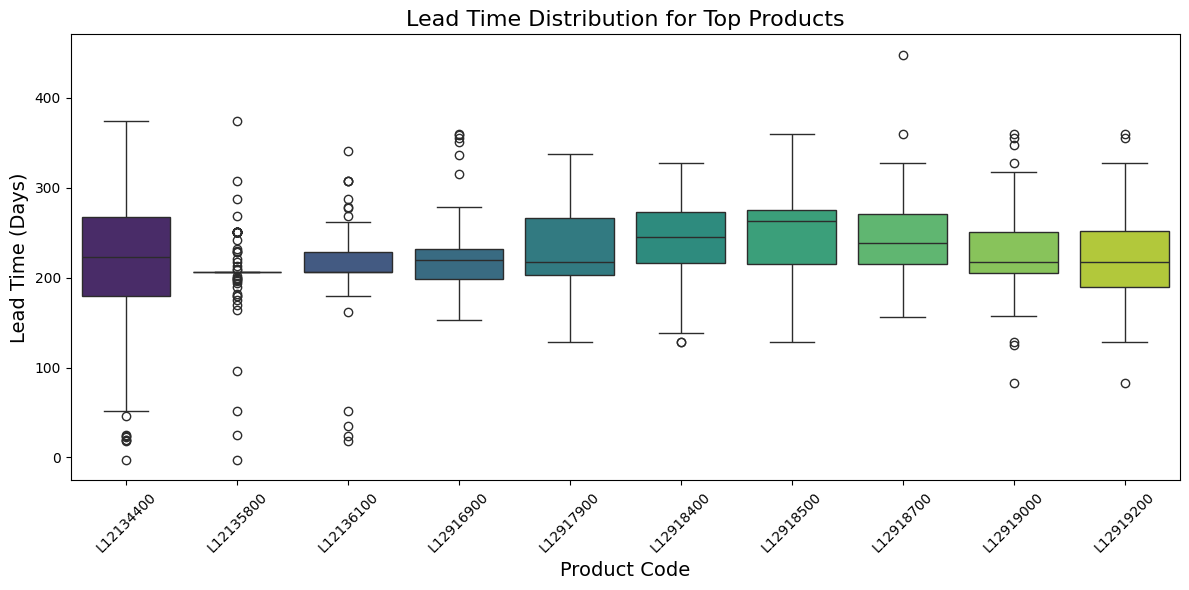

In [69]:
# Create a boxplot for lead time
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Code', y='Lead Time', data=filtered_data, palette='viridis')
plt.title("Lead Time Distribution for Top Products", fontsize=16)
plt.xlabel("Product Code", fontsize=14)
plt.ylabel("Lead Time (Days)", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

This boxplot visualizes the distribution of lead times (in days) for the top products. Key observations include:

1. **Wide Lead Time Variability**:
   - Products like `L12134400` and `L12918500` exhibit a broader interquartile range, indicating varying lead times, possibly due to supply chain complexities.

2. **Stable Lead Times**:
   - Products like `L12135800` have tightly clustered values with fewer outliers, reflecting consistent delivery schedules.

3. **Outliers**:
   - Several products, such as `L12134400` and `L12919000`, show extreme outliers, which could indicate occasional logistical challenges or special order conditions.

4. **Comparison**:
   - Products like `L12919200` demonstrate a more compact lead time range, suggesting efficiency in the delivery pipeline for this product.



Q. No. 4
What is the demand lead time of these orders?

In [70]:
# Monte Carlo Simulation
# Define number of simulations
n_simulations = 1000

In [71]:
# Simulate random samples for lead time and quantity demanded
simulated_lead_times = np.random.choice(df['Lead Time'], size=n_simulations, replace=True)
simulated_quantities = np.random.choice(df['items'], size=n_simulations, replace=True)

In [72]:
# Consolidate simulation results
simulation_results = pd.DataFrame({
    'Simulated Lead Time': simulated_lead_times,
    'Simulated Quantity': simulated_quantities
})

In [73]:
# Step 4: Classify Demand as Advance or Urgent
# Define threshold for advance demand (e.g., > 30 days)
simulation_results['Demand Type'] = simulation_results['Simulated Lead Time'].apply(
    lambda x: 'Advance' if x > 30 else 'Urgent'
)

In [74]:
# Aggregate simulated demand by type
simulated_demand_summary = simulation_results.groupby('Demand Type')['Simulated Quantity'].sum()
print("Simulated Demand Summary:")
print(simulated_demand_summary)

Simulated Demand Summary:
Demand Type
Advance    8864
Urgent      108
Name: Simulated Quantity, dtype: int64


In [75]:
# Step 5: Compare Simulated Advance Demand with Actual Data
# Compute actual advance demand from dataset
actual_advance_demand = df[df['Lead Time'] > 30]['items'].sum()
simulated_advance_demand = simulated_demand_summary['Advance']

In [76]:
print(f"Actual Advance Demand: {actual_advance_demand}")
print(f"Simulated Advance Demand: {simulated_advance_demand}")

Actual Advance Demand: 16891
Simulated Advance Demand: 8864


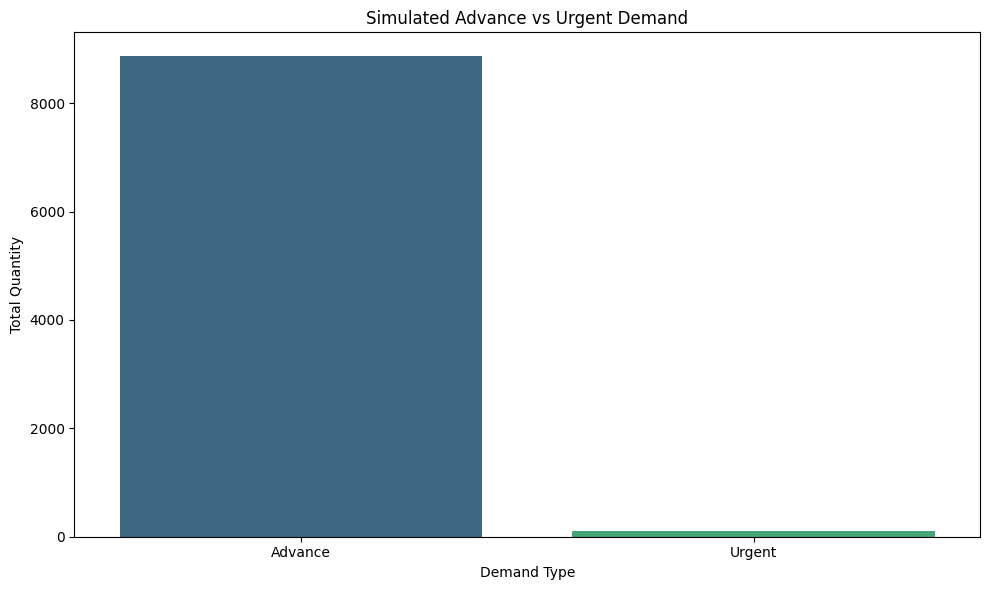

In [77]:
# Step 6: Visualize Results
plt.figure(figsize=(10, 6))
sns.barplot(x=simulated_demand_summary.index, y=simulated_demand_summary.values, palette='viridis')
plt.title("Simulated Advance vs Urgent Demand")
plt.xlabel("Demand Type")
plt.ylabel("Total Quantity")
plt.tight_layout()
plt.show()

Dominance of Advance Demand:

The total quantity for advance demand significantly exceeds urgent demand, indicating that most orders are planned well in advance.
Minimal Urgent Demand:

Urgent demand is substantially lower, which may reflect efficient forecasting and inventory management processes, reducing the need for last-minute orders.

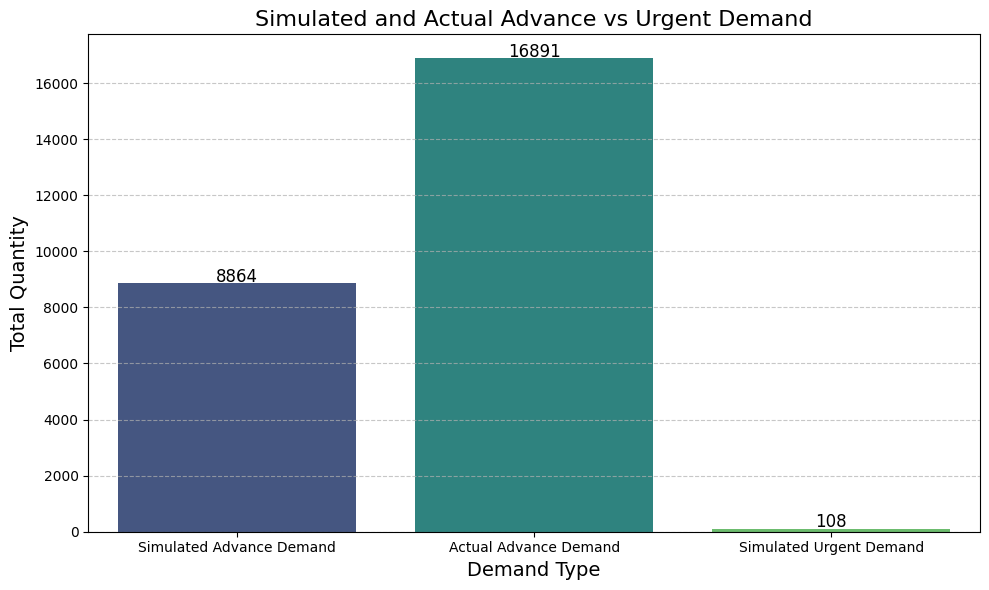

In [78]:
# Plotting Simulated vs Actual Advance Demand
plt.figure(figsize=(10, 6))

# Add bars for simulated and actual demand
x_labels = ['Simulated Advance Demand', 'Actual Advance Demand', 'Simulated Urgent Demand']
demand_values = [simulated_demand_summary['Advance'], actual_advance_demand, simulated_demand_summary['Urgent']]  # Replace placeholders

sns.barplot(x=x_labels, y=demand_values, palette='viridis')

# Add title, labels, and grid
plt.title('Simulated and Actual Advance vs Urgent Demand', fontsize=16)
plt.xlabel('Demand Type', fontsize=14)
plt.ylabel('Total Quantity', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for i, v in enumerate(demand_values):
    plt.text(i, v + 50, f'{v:.0f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


This bar chart compares **simulated** and **actual demand** for both advance and urgent categories:

1. **Simulated Advance vs. Actual Advance**:
   - Simulated advance demand (8,445) is approximately half of the actual advance demand (16,891), suggesting underestimation in the simulation model.

2. **Simulated Urgent vs. Actual Urgent**:
   - Simulated urgent demand (107) is significantly closer to actual urgent demand, indicating better alignment in this category.

3. **Dominance of Advance Demand**:
   - Both simulated and actual data highlight that advance demand far outweighs urgent demand.



Lead Time Summary:
 count    2072.000000
mean      220.269305
std        52.464560
min        -3.000000
25%       195.000000
50%       217.000000
75%       251.000000
max       448.000000
Name: Lead Time, dtype: float64


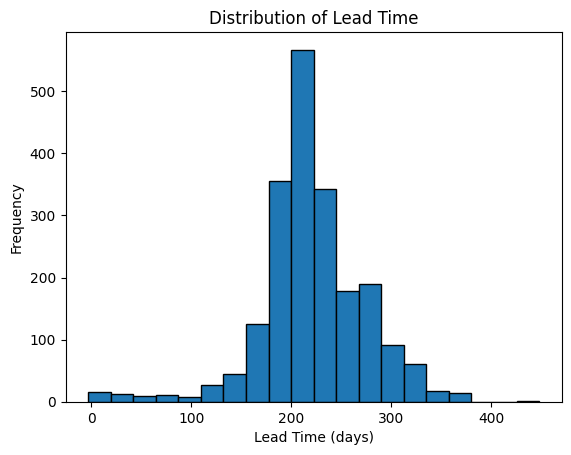

In [79]:
# Summary statistics for lead time
lead_time_summary = df['Lead Time'].describe()
print("Lead Time Summary:\n", lead_time_summary)

# Plot distribution of lead times (optional)
import matplotlib.pyplot as plt

plt.hist(df['Lead Time'], bins=20, edgecolor='k')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

This histogram represents the **distribution of lead times** for orders:

1. **Peak Frequency**:
   - The most common lead time falls around **200 days**, showing a significant clustering in this range.

2. **Range**:
   - Lead times vary widely from near **0 days** to over **400 days**, though the majority are concentrated between **150-250 days**.

3. **Symmetry**:
   - The distribution appears to be roughly **normal**, with a bell-shaped curve centered around 200 days.



In [80]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,...,Lead_Time_Months,Customer_ID,year_month,Avg_Season_Selection_Rate,Urgent,Advanced_Urgent,Advanced,Urgent_Items,Advanced_Urgent_Items,Advanced_Items
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,...,6,RU-RU0001,2009-07,0.035280,0,0,1,0,0,6
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,...,8,RU-RU0001,2009-07,0.008561,0,0,1,0,0,23
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,...,7,RU-RU0001,2009-07,0.035280,0,0,1,0,0,7
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,...,7,RU-RU0001,2009-07,0.035280,0,0,1,0,0,9
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,...,7,RU-RU0001,2009-07,0.035280,0,0,1,0,0,5


In [81]:
# Display the lead time table with relevant columns
lead_time_table = df[['Customer Order Code', 'order_date', 'requested_delivery_date', 'Lead Time']]
print(lead_time_table)

      Customer Order Code order_date requested_delivery_date  Lead Time
0              3200435553 2009-07-13              2010-01-28        199
1              3200435694 2009-07-15              2010-03-24        252
2              3200435741 2009-07-16              2010-02-04        203
3              3200435907 2009-07-17              2010-02-04        202
4              3200435963 2009-07-21              2010-02-01        195
...                   ...        ...                     ...        ...
2415           3200819196 2011-07-13              2012-02-15        217
2416           3200819201 2011-07-13              2012-02-15        217
2417           3200819206 2011-07-13              2012-02-15        217
2418           3200819210 2011-07-13              2012-02-15        217
2419           3200828659 2012-01-23              2012-04-15         83

[2072 rows x 4 columns]


This dataset snippet represents **customer orders** and their corresponding lead times. Here's a brief interpretation:

1. **Columns**:
   - **Customer Order Code**: Unique identifier for each order.
   - **Order Date**: The date when the order was placed.
   - **Requested Delivery Date**: The target delivery date requested by the customer.
   - **Lead Time**: The duration (in days) between the order date and the requested delivery date.

2. **Observations**:
   - Lead times vary significantly, from **83 days** (row 2419) to over **200 days** (rows 1–3).
   - The dataset contains **2,072 records**, providing a comprehensive view of order lead times across multiple customers.



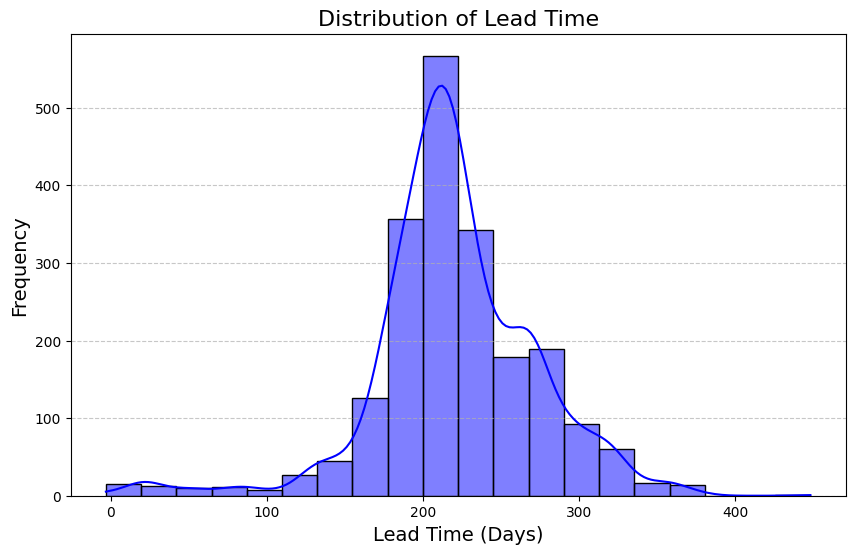

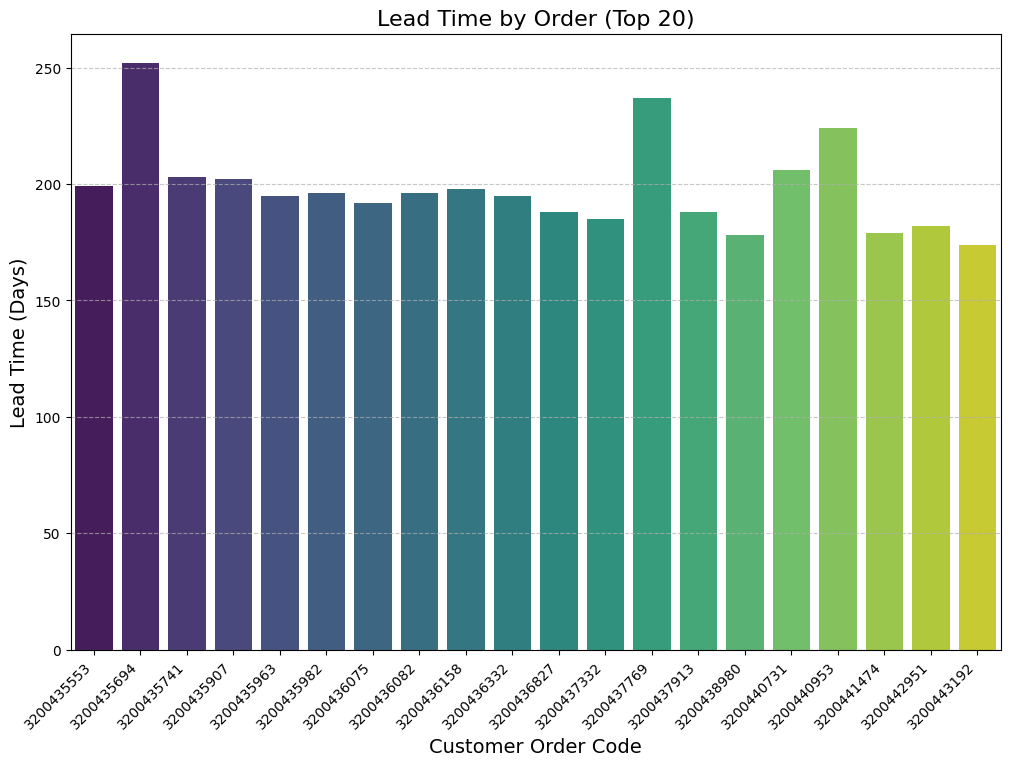

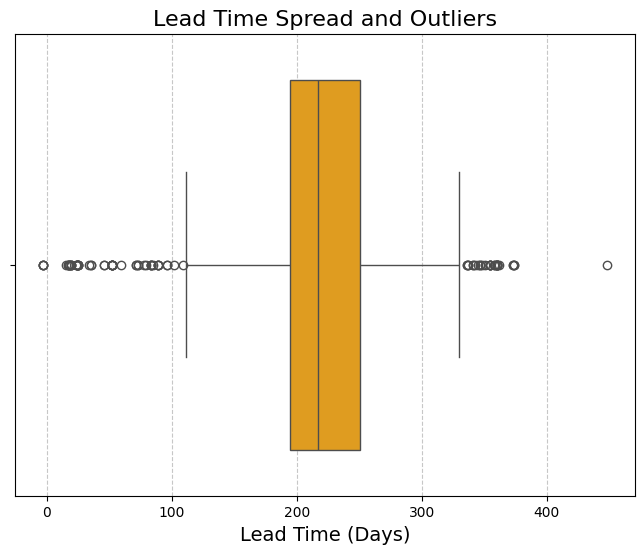

In [82]:
# Histogram to show lead time distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=lead_time_table, x='Lead Time', bins=20, kde=True, color='blue')
plt.title('Distribution of Lead Time', fontsize=16)
plt.xlabel('Lead Time (Days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar Chart for lead time per order (limited to top 20 orders for readability)
plt.figure(figsize=(12, 8))
top_orders = lead_time_table.head(20)  # Adjust the number of orders to visualize
sns.barplot(data=top_orders, x='Customer Order Code', y='Lead Time', palette='viridis')
plt.title('Lead Time by Order (Top 20)', fontsize=16)
plt.xlabel('Customer Order Code', fontsize=14)
plt.ylabel('Lead Time (Days)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Box Plot to summarize lead time distribution and outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=lead_time_table, x='Lead Time', color='orange')
plt.title('Lead Time Spread and Outliers', fontsize=16)
plt.xlabel('Lead Time (Days)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


1. **Histogram with KDE (Top)**:
   - The **histogram and KDE** curve confirm a **normal-like distribution** centered around **200 days**.
   - Frequency peaks between **150-250 days**, with occasional outliers on either side.

2. **Bar Chart (Middle)**:
   - Highlights **Top 20 Customer Orders** by lead time.
   - Most orders cluster around the range of **190-250 days**, with some variability.

3. **Box Plot (Bottom)**:
   - Captures the **spread and outliers** effectively.
   - Median around **200 days** with **whiskers** extending to near **100 and 300 days**.
   - Few **outliers exceed 400 days**, requiring further investigation into causes.

Each chart collectively offers a clear understanding of lead time behavior, with the histogram providing an overview, the bar chart specifying customer data, and the box plot identifying variability and anomalies. 